* Deep learning models that can process text (sequences of words or sequences of characters), time-series, etc.

* Two fundamental approaches for sequence processing: *recurrent neural networks* and *1D convnets*

* Applications
  * Document/time-series classification
  * Sequence-to-sequence learning such as machine translation
  * Sentiment analysis
  
  

## 6.0 Sequential data and its representation

* Sequential data
   ><img src="https://drive.google.com/uc?id=1KXNDV8UmKmyX4mJ2JgJuB7SFuexptHLv" width="700">

* Sequence representation
  * Bag of words
   ><img src="https://drive.google.com/uc?id=1K_MPN_ratOyOMXB0ANiTp8w28QEAFrOj" width="700">
   
  * How can we deal with an order in sequence?

  * Concatenate one-hot vectors
     ><img src="https://drive.google.com/uc?id=1KalhM2_QwI4YZC-NEl43phQgJHDX4jQh" width="550">

* To develop a model for sequence data, we need
  * to deal with variable length sequences
  * to maintain sequence order
  * to keep track of long-term dependencies
  * to share parameters across the sequence

## 6.1 Working with text data

* Text is one of the most common forms of sequence data: a sequence of characters or a sequence of words.

* *Vectorizing* text is the process of transforming text into numeric tensors.
  * Segment text into words, and transform each word into a vector.
  * Segment text into characters, and transform each character into a vector.
  * Extract n-grams of words or characters, and transform each n-gram into a vector.
    * *N-grams* are overlapping groups of multiple consecutive words or characters.
    * Example. "The cat set on the mat."
      * A bag-of-2-grams = `{"The", "The cat", "cat", "cat sat", "sat", "sat on", "on", "on the", "the", "the mat", "mat"}`
      * A bag-of-3-grams = `{"The", "The cat", "cat", "cat sat", "The cat sat","sat", "sat on", "on", "cat sat on", "on the", "the", "sat on the", "the mat", "mat", "on the mat"}`
    
* The different units into which you can break down text (words, characters, or n-grams) are called *tokens*, and breaking text into such tokens is called *tokenization*.

* All text-vectorization processes consist of applying some tokenization scheme and then associating numeric vectors with the generated tokens.
  * These vectors, packed into sequence tensors, are fed into deep neural networks.
  

### Tokenization

* One of the most important steps in text preprocessing
* The process of splitting a phrase, sentence, paragraph, one or multiple text documents into smaller units
  * Each os these smaller units is called a token.
  * Tokens can be anything: a word, a subword, or even a character.

  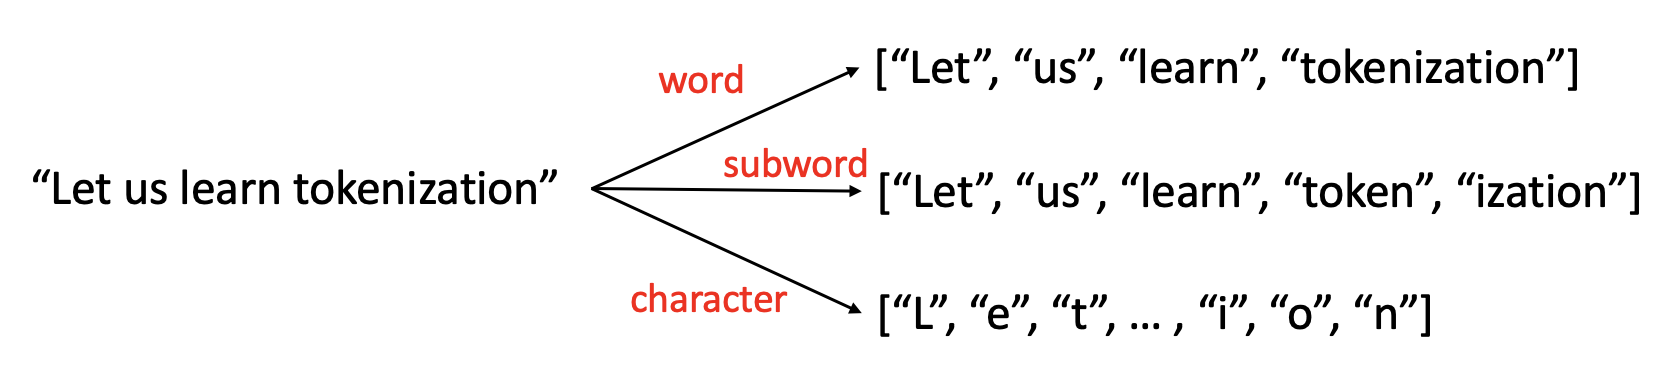

* Word-based tokenization
  * The most commonly used delimiter is space.
  * "Is it weird I don't like coffee?" --> ["Is", "it", "weird", "I", "don't", "like", "coffee?"]
  * (if punctuation into account) --> ["Is", "it", "weird", "I", "don", "'", "t", "like", "coffee", "?"]
  * Simple, but a big vocabulary (a huge embedding matrix)
    * What if we limit the number of words that can be added to the vocabularly?

* Character-based tokenization
  * Split the raw text into individual characters
    * This results in a very small vocabulary.
  * Drawbacks
    * A character usually don't carry any meaning or information.
    * Reducing the vocabulary size has a trade-off-with the sequence length.

* Subword-based tokenization
  * A solution between word and character-based tokenization
    * Word-level: large vocab size, OOV tokens, misspelled words
    * Char-level: long sequences, less meaningful individual tokens
  * Principle
    * Do not split the frequently used words into smaller subwords.
    * Split the rare words into smaller meaningful subwords.
    * E.g., "boys" --> ["boy", "s"]
  * It is even possible for a model to process a word which it has never seen before as the decomposition can lead to known subwords.

* Byte-Pair Encoding (BPE)
  * BPE was originally a data compression algorithm proposed in 1994.
  * BPE is a powerful tool for subword tokenization.
  * The core idea
    * Iteratively find the most frequent pair of adjacent characters (or bytes) in the data and merge them into a single, new token.
    * Through this process, sequence of characters that frequently appear together are gradually grouped into meaningful subword units.
  * Process
    * Pre-tokenization --> measure frequency --> merge
  * Suppose that our corpus uses these five words.
    * ["hug", "pug", "pun", "bun", "hugs"]
    * The base vocab = ["b", "g", "h", "n", "p", "s", "u"]
    * Base vocab will contain all the ASCII characters or Unicode characters.
  * Some characters will be converted to the unknown token.
    * E.g., emojis
    * Byte-level BPE can solve this issue.
  * With base vocab, we add new tokens until the desired vocab size is reached by learning merges.
    * merge = rules to merge two elements of the existing vocab together into a new one
  * During the tokenizer training, the BPE algorithm searches for the most frequent pair of existing tokens.
  * That most frequent pair is the one that will be merged, and we rinse and repeat for the next step.


* BPE example
  * 1) Assume that the words have the following frequencies.
    * ("hug", 10), ("pug", 5), ("pun", 12), ("bun", 4), ("hugs", 5)
  * 2) Split each word into characters (tokens in our base vocab)
    * ("h" "u" "g", 10), ("p" "u" "g", 5), ("p" "u" "n", 12), ("b" "u" "n", 4), ("h" "u" "g" "s", 5)
  * 3) Merge the most frequent pair: ("u", "g") -> "ug"
    * Vocab: ["b", "g", "h", "n", "p", "s", "u", "ug"]
    * Corpus: ("h" "ug", 10), ("p" "ug", 5), ("p" "u" "n", 12), ("b" "u" "n", 4), ("h" "ug" "s", 5)
  * 4) Merge the most frequent pair: ("u", "n") -> "un"
    * Vocab: ["b", "g", "h", "n", "p", "s", "u", "ug", "un"]
    * Corpus: ("h" "ug", 10), ("p" "ug", 5), ("p" "un", 12), ("b" "un", 4), ("h" "ug" "s", 5)
  * 5) Merge the most frequent pair: ("h", "ug") -> "hug"
    * Vocab: ["b", "g", "h", "n", "p", "s", "u", "ug", "un", "hug"]
    * Corpus: ("hug", 10), ("p" "ug", 5), ("p" "un", 12), ("b" "un", 4), ("hug" "s", 5)
  * Continue until we reach the desired vocab size.

  * Given the following vocab:
    * Vocab: ["b", "g", "h", "n", "p", "s", "u", "ug", "un", "hug"]
    * Corpus: ("hug", 10), ("p" "ug", 5), ("p" "un", 12), ("b" "un", 4), ("hug" "s", 5)
  * New inputs are tokenized as follows:
    * "bug" -> ["b", "ug"]
    * "mug" -> ["[UNK]", "ug"]
    * "thug" -> ["[UNK]", "hug"]
    * "unhug" -> ?
    

In [ ]:
# ==============================================================================
# Exercise: BPE-based Tokenizer (OpenAI's Tiktoken)
# - The method used by models like GPT-4 and GPT-3.5-turbo.
# - Feature: Sophisticated Regex Pre-tokenization + Byte-Level BPE.
# ==============================================================================
import tiktoken

print("="*25 + " Exercise 1: BPE-based Tokenizer (tiktoken) " + "="*25)

# 1. Load the tokenizer
# 'cl100k_base' is the encoding name used by OpenAI for models like GPT-4.
tokenizer_bpe = tiktoken.get_encoding("cl100k_base")

# 2. Define a sample text with English, numbers, and Korean
text = "Hello, world! 2024 is the year of AI. 안녕하세요!"

# 3. Encode (Text -> Token IDs)
encoded_ids_bpe = tokenizer_bpe.encode(text)

print(f"Original Text: {text}")
print(f"BPE Encoding Result (Token IDs): {encoded_ids_bpe}")
print(f"Total BPE Tokens: {len(encoded_ids_bpe)}\n")

# 4. Decode (Token IDs -> Text)
decoded_text_bpe = tokenizer_bpe.decode(encoded_ids_bpe)

print(f"BPE Decoding Result: {decoded_text_bpe}\n")

# 5. Inspect the individual tokens
print("Inspecting individual BPE tokens:")
tokens_bpe = [tokenizer_bpe.decode([token_id]) for token_id in encoded_ids_bpe]
print(tokens_bpe)
print("\n[Analysis Point 1] Note how the leading space is part of the token itself (e.g., ' world').")
print("[Analysis Point 2] Note how '안녕하세요' (Korean) is broken down into multiple, less intuitive byte-level tokens. This is inefficient but prevents 'unknown token' errors.\n\n")

========================= Exercise 1: BPE-based Tokenizer (tiktoken) =========================
Original Text: Hello, world! 2024 is the year of AI. 안녕하세요!
BPE Encoding Result (Token IDs): [9906, 11, 1917, 0, 220, 2366, 19, 374, 279, 1060, 315, 15592, 13, 96270, 75265, 243, 92245, 0]
Total BPE Tokens: 18

BPE Decoding Result: Hello, world! 2024 is the year of AI. 안녕하세요!

Inspecting individual BPE tokens:
['Hello', ',', ' world', '!', ' ', '202', '4', ' is', ' the', ' year', ' of', ' AI', '.', ' 안', '�', '�', '하세요', '!']

[Analysis Point 1] Note how the leading space is part of the token itself (e.g., ' world').
[Analysis Point 2] Note how '안녕하세요' (Korean) is broken down into multiple, less intuitive byte-level tokens. This is inefficient but prevents 'unknown token' errors.




### Vectorization


* There are multiple ways to associate a vector with a token.
  * *one-hot encoding* of tokens
  * *token embedding* (typically used exclusively for words, and called *word embedding*)
  
   ><img src="https://drive.google.com/uc?id=1OPETAyv8eHo0eMhmgZ-Kj2vYFmp4TItS" width="500">

> ### One-hot encoding

* The most common, most basic way to turn a token into a vector
  
* It consists of associating a unique integer index with every token and then turning this integer index $i$ into a binary vector of size $N$ (the size of the vocabulary).
  * The vector is all zeros except for the $i$th entry, which is 1.
  

In [ ]:
# Word-level one-hot encoding

import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# build vocabulary dictionary
token_index = {}
for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word] = len(token_index)+1 # assign a unique index to each word

max_length = 10 # only consider the first max_length words
results = np.zeros(shape=(len(samples),
                          max_length,
                          max(token_index.values())+1))

for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i, j, index] = 1.

In [ ]:
token_index

{'The': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'the': 5,
 'mat.': 6,
 'dog': 7,
 'ate': 8,
 'my': 9,
 'homework.': 10}

In [ ]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [ ]:
# Character-level one-hot encoding

import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable
token_index = dict(zip(characters, range(1, len(characters) + 1)))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values())+1))
for i, sample in enumerate(samples):
  for j, character in enumerate(sample):
    index = token_index.get(character)
    results[i, j, index] = 1.

In [ ]:
token_index

{'0': 1,
 '1': 2,
 '2': 3,
 '3': 4,
 '4': 5,
 '5': 6,
 '6': 7,
 '7': 8,
 '8': 9,
 '9': 10,
 'a': 11,
 'b': 12,
 'c': 13,
 'd': 14,
 'e': 15,
 'f': 16,
 'g': 17,
 'h': 18,
 'i': 19,
 'j': 20,
 'k': 21,
 'l': 22,
 'm': 23,
 'n': 24,
 'o': 25,
 'p': 26,
 'q': 27,
 'r': 28,
 's': 29,
 't': 30,
 'u': 31,
 'v': 32,
 'w': 33,
 'x': 34,
 'y': 35,
 'z': 36,
 'A': 37,
 'B': 38,
 'C': 39,
 'D': 40,
 'E': 41,
 'F': 42,
 'G': 43,
 'H': 44,
 'I': 45,
 'J': 46,
 'K': 47,
 'L': 48,
 'M': 49,
 'N': 50,
 'O': 51,
 'P': 52,
 'Q': 53,
 'R': 54,
 'S': 55,
 'T': 56,
 'U': 57,
 'V': 58,
 'W': 59,
 'X': 60,
 'Y': 61,
 'Z': 62,
 '!': 63,
 '"': 64,
 '#': 65,
 '$': 66,
 '%': 67,
 '&': 68,
 "'": 69,
 '(': 70,
 ')': 71,
 '*': 72,
 '+': 73,
 ',': 74,
 '-': 75,
 '.': 76,
 '/': 77,
 ':': 78,
 ';': 79,
 '<': 80,
 '=': 81,
 '>': 82,
 '?': 83,
 '@': 84,
 '[': 85,
 '\\': 86,
 ']': 87,
 '^': 88,
 '_': 89,
 '`': 90,
 '{': 91,
 '|': 92,
 '}': 93,
 '~': 94,
 ' ': 95,
 '\t': 96,
 '\n': 97,
 '\r': 98,
 '\x0b': 99,
 '\x0c': 100

In [ ]:
results.shape

(2, 50, 101)

In [ ]:
results[0,0,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
np.where(results[0,0,:]==1)

(array([56]),)

> ### Word embeddings

* The use of dense *word vectors*, also called *word embeddings*
  * One-hot encoding = binary, sparse, high-dimensional
  
     ><img src="https://drive.google.com/uc?id=1OLEsO_WXHfXZgijrSFTRsLsVW0AJwSse" width="700">

* How to obtain word embeddings?
  * Learn word embeddings jointly with the main task
  * Load the precomputed word embeddings (*pretrained word embeddings*)

* **Learning word embeddings**

  * In embedding space, the geometric relationship (distance, direction, etc.) between word vectors should reflect the semantic relationships between these words. \

  ><img src="https://drive.google.com/uc?id=1OKWly7N_E7w4iSmQkId1pbFcKE0HOCkf" width="300">

  * Is there some ideal word-embedding space that would perfectly map human language and could be used for any natural-language-processing task?
  
  * The `Embedding` layer in PyTorch
  
  ```python
        import torch
        import torch.nn as nn

        embedding_layer = nn.Embedding(num_embeddings=1000, embedding_dim=64)
  ```

  * The `Embedding` layer takes as input a 2D tensor of integers `(samples, sequence_length)`, and returns a 3D floating-point tensor of shape `(samples, sequence_length, embedding_dimensionality)`.
  * Each integer in the input corresponds to an index in the embedding matrix, and the layer looks up the corresponding learned vector during the forward pass.

In [ ]:
import torch
import torch.nn as nn

embedding_layer = nn.Embedding(num_embeddings=1000, embedding_dim=64)

# Example input: batch of 2 samples, each with 4 token indices
input_indices = torch.tensor([[1, 2, 3, 4],
                              [4, 3, 2, 1]])

output = embedding_layer(input_indices)
print("Output shape:", output.shape)


Output shape: torch.Size([2, 4, 64])


* An embedding layer is mathematically equivalent to a linear layer without bias applied to one-hot vectors.

In [ ]:
import torch
import torch.nn as nn

# Vocabulary of size 5, embedding dim 3
embedding = nn.Embedding(5, 3)
linear = nn.Linear(5, 3, bias=False)

# Copy weights so they’re identical
linear.weight.data = embedding.weight.data.clone()

# Input: index 2 -> one-hot equivalent is [0,0,1,0,0]
index = torch.tensor([2])
one_hot = torch.nn.functional.one_hot(index, num_classes=5).float()

# Compare outputs
print("Embedding:", embedding(index))
print("Linear (one-hot):", one_hot @ linear.weight)


Embedding: tensor([[-0.5881, -0.8058,  0.9569]], grad_fn=<EmbeddingBackward0>)
Linear (one-hot): tensor([[-0.5881, -0.8058,  0.9569]], grad_fn=<MmBackward0>)


* Then, why use `Embedding` instead of `Linear`
  * Efficiency: One-hot encoding would create extremely large, mostly zero vectors. `Embedding` performs direct row indexing, which is O(1) and memory-efficient.
  * Interpretability: `Embedding` directly stores the token vectors and can be pretrained, visualized, or reused.
  * Simplicity: It's conceptually clear, "Each token has its own learnable vectors."

### Revisited) Binary Classification with IMDB

In [108]:
import re, random
import torch
from collections import Counter
from datasets import load_dataset

ds = load_dataset("imdb")

id2label = {0: "neg", 1: "pos"}
train_list = [(id2label[int(r["label"])], r["text"]) for r in ds["train"]]
test_list  = [(id2label[int(r["label"])], r["text"]) for r in ds["test"]]

In [ ]:
# Simple tokenizer (English)
def simple_tokenize(s: str):
    # alphanumeric word tokens, lowercased
    return re.findall(r"\b\w+\b", s.lower())

# Build vocab from training set
#    Keep top-N frequent tokens
MAX_VOCAB = 10000
specials = ["<unk>", "<pad>"]
counter = Counter()
for _, txt in train_list:
    counter.update(simple_tokenize(txt))

most_common = [w for w, _ in counter.most_common(MAX_VOCAB - len(specials))]
itos = specials + most_common
stoi = {w: i for i, w in enumerate(itos)}
UNK_IDX = stoi["<unk>"]
PAD_IDX = stoi["<pad>"]

In [ ]:
label_to_int = {"neg": 0, "pos": 1}

# set MAX sequence length
MAX_LEN = 300

def text_pipeline(x: str):
    ids = [stoi.get(tok, UNK_IDX) for tok in simple_tokenize(x)]
    if len(ids) > MAX_LEN:
        ids = ids[:MAX_LEN]
    return torch.tensor(ids, dtype=torch.long)

def label_pipeline(y: str):
    return torch.tensor(label_to_int[y], dtype=torch.float32)

In [ ]:
random.seed(42)
random.shuffle(train_list)
split_idx = int(len(train_list) * 0.9)
train_data = train_list[:split_idx]
valid_data = train_list[split_idx:]
test_data  = test_list

In [ ]:
print(f"Vocab size: {len(stoi)}, Train/Valid/Test: {len(train_data)}/{len(valid_data)}/{len(test_data)}")

Vocab size: 10000, Train/Valid/Test: 22500/2500/25000


In [ ]:
import os, random, math, time
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence
import torch.optim as optim

SEED = 42
random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DEVICE

device(type='cuda')

In [ ]:
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

def collate_batch(batch):
    text_list, label_list = [], []
    for (label, text) in batch:
        text_list.append(text_pipeline(text))
        label_list.append(label_pipeline(label))
    # pad to the same length
    text_padded = pad_sequence(text_list, batch_first=True, padding_value=PAD_IDX)
    labels = torch.stack(label_list)
    return text_padded.to(DEVICE), labels.to(DEVICE)

BATCH_SIZE = 128
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)
valid_loader = DataLoader(valid_data, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_batch)
test_loader  = DataLoader(test_data,  batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_batch)
len(train_loader), len(valid_loader), len(test_loader)

(176, 20, 196)

In [ ]:
class SentimentMLP(nn.Module):
    def __init__(self, vocab_size, embed_dim=64, hidden_dims=(32, 32), pad_idx=None):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=pad_idx if pad_idx is not None else 0)
        layers = []
        in_dim = embed_dim
        for h in hidden_dims:
            layers += [nn.Linear(in_dim, h), nn.ReLU()]
            in_dim = h
        layers += [nn.Linear(in_dim, 1)]  # output logit
        self.mlp = nn.Sequential(*layers)

    def forward(self, x):
        # x: (B, T)
        emb = self.embedding(x)  # (B, T, E)
        # Create mask for non-pad tokens
        if hasattr(self.embedding, "padding_idx") and self.embedding.padding_idx is not None:
            pad_idx = self.embedding.padding_idx
        else:
            pad_idx = 0
        mask = (x != pad_idx).unsqueeze(-1)  # (B, T, 1)
        emb = emb * mask  # zero out pad embeddings
        lengths = mask.sum(dim=1).clamp(min=1)  # (B, 1)
        mean_pooled = emb.sum(dim=1) / lengths  # (B, E)
        logits = self.mlp(mean_pooled).squeeze(1)  # (B,)
        return logits

model = SentimentMLP(vocab_size=len(stoi), embed_dim=64, hidden_dims=(32, 32), pad_idx=PAD_IDX).to(DEVICE)
model

SentimentMLP(
  (embedding): Embedding(10000, 64, padding_idx=1)
  (mlp): Sequential(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [ ]:
def binary_accuracy_from_logits(logits, targets):
    probs = torch.sigmoid(logits)
    preds = (probs >= 0.5).float()
    correct = (preds == targets).sum().item()
    return correct / targets.numel()

def run_epoch(dataloader, model, criterion, optimizer=None):
    is_train = optimizer is not None
    model.train() if is_train else model.eval()
    total_loss, total_acc, total_count = 0.0, 0.0, 0
    for xb, yb in dataloader:
        if is_train:
            optimizer.zero_grad(set_to_none=True)
        logits = model(xb)
        loss = criterion(logits, yb)
        if is_train:
            loss.backward()
            optimizer.step()
        bs = yb.size(0)
        total_loss += loss.item() * bs
        total_acc  += binary_accuracy_from_logits(logits.detach(), yb) * bs
        total_count += bs
    return total_loss / total_count, total_acc / total_count

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

EPOCHS = 20
history = {"train_loss": [], "train_acc": [], "valid_loss": [], "valid_acc": []}
best_val_acc, best_state = 0.0, None

for epoch in range(1, EPOCHS + 1):
    tr_loss, tr_acc = run_epoch(train_loader, model, criterion, optimizer)
    va_loss, va_acc = run_epoch(valid_loader, model, criterion, optimizer=None)

    history["train_loss"].append(tr_loss)
    history["train_acc"].append(tr_acc)
    history["valid_loss"].append(va_loss)
    history["valid_acc"].append(va_acc)

    print(f"Epoch {epoch:02d} | train_loss={tr_loss:.4f} acc={tr_acc:.4f} | valid_loss={va_loss:.4f} acc={va_acc:.4f}")
    if va_acc > best_val_acc:
        best_val_acc = va_acc
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}

if best_state is not None:
    model.load_state_dict(best_state)


Epoch 01 | train_loss=0.6262 acc=0.6577 | valid_loss=0.4695 acc=0.7880
Epoch 02 | train_loss=0.3948 acc=0.8227 | valid_loss=0.3757 acc=0.8400
Epoch 03 | train_loss=0.3111 acc=0.8693 | valid_loss=0.3277 acc=0.8636
Epoch 04 | train_loss=0.2654 acc=0.8932 | valid_loss=0.3172 acc=0.8676
Epoch 05 | train_loss=0.2344 acc=0.9088 | valid_loss=0.3293 acc=0.8672
Epoch 06 | train_loss=0.2094 acc=0.9199 | valid_loss=0.3058 acc=0.8816
Epoch 07 | train_loss=0.1877 acc=0.9288 | valid_loss=0.3125 acc=0.8844
Epoch 08 | train_loss=0.1696 acc=0.9385 | valid_loss=0.3205 acc=0.8824
Epoch 09 | train_loss=0.1520 acc=0.9449 | valid_loss=0.3273 acc=0.8828
Epoch 10 | train_loss=0.1382 acc=0.9524 | valid_loss=0.3384 acc=0.8824
Epoch 11 | train_loss=0.1224 acc=0.9593 | valid_loss=0.3579 acc=0.8820
Epoch 12 | train_loss=0.1081 acc=0.9662 | valid_loss=0.3786 acc=0.8784
Epoch 13 | train_loss=0.0968 acc=0.9705 | valid_loss=0.3995 acc=0.8752
Epoch 14 | train_loss=0.0855 acc=0.9766 | valid_loss=0.4289 acc=0.8752
Epoch 

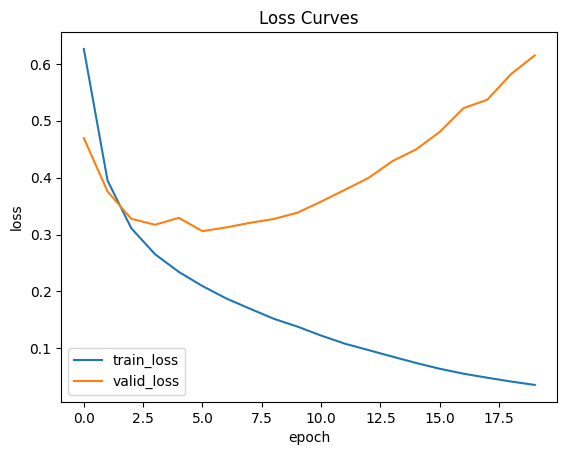

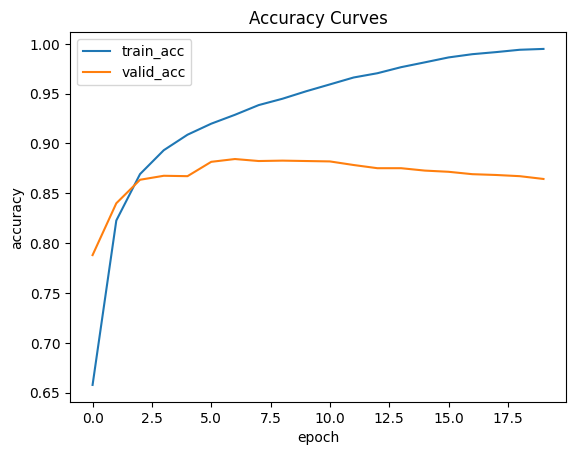

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history["train_loss"], label="train_loss")
plt.plot(history["valid_loss"], label="valid_loss")
plt.xlabel("epoch"); plt.ylabel("loss"); plt.legend(); plt.title("Loss Curves")
plt.show()

plt.figure()
plt.plot(history["train_acc"], label="train_acc")
plt.plot(history["valid_acc"], label="valid_acc")
plt.xlabel("epoch"); plt.ylabel("accuracy"); plt.legend(); plt.title("Accuracy Curves")
plt.show()


In [ ]:
test_loss, test_acc = run_epoch(test_loader, model, criterion, optimizer=None)
print(f"TEST | loss={test_loss:.4f} acc={test_acc:.4f}")

TEST | loss=0.3433 acc=0.8610


### Using pretrained word embeddings

* You don't have enough data available to learn truly powerful features on your own, but you expect the features that you need to be fairly generic.

* Word embedding models
  * Word2Vec (2013)
  * Global Vectors for Word Representation (GloVe) (2014)
  * fastText (2016)
  * BERT (2018)
    

* From raw text to word embeddings
  * Refer to the implementation above

In [ ]:
# downloading the GloVe word embedding and preprocessing
# download url = https://drive.google.com/open?id=1NgMR-bnt02gYTr44BVTo2fRePastYypW

# mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

EMBED_DIM = 100
glove_path =  '/content/gdrive/My Drive/Lectures/deep-learning/datasets/glove.6B/glove.6B.100d.txt'


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np

def load_glove_txt(glove_path, embedding_dim=100):
    """Read glove.6B.100d.txt into a dict: token -> np.array(embedding_dim)."""
    vectors = {}
    with open(glove_path, "r", encoding="utf-8") as f:
        for line in f:
            parts = line.rstrip().split(" ")
            token = parts[0]
            coefs = np.asarray(parts[1:], dtype=np.float32)
            if coefs.shape[0] != embedding_dim:
                continue  # skip malformed rows
            vectors[token] = coefs
    return vectors

def build_embedding_matrix(stoi, glove_dict, embedding_dim=100, pad_idx=0, oov_init="normal"):
    """
    Build a (vocab_size x embedding_dim) embedding matrix aligned to 'stoi'.
    PAD row is zeros. OOV tokens use small random init.
    """
    vocab_size = len(stoi)
    emb = np.zeros((vocab_size, embedding_dim), dtype=np.float32)

    # OOV initialization
    if oov_init == "normal":
        def new_oov(): return np.random.normal(0, 0.05, size=(embedding_dim,)).astype(np.float32)
    elif oov_init == "uniform":
        def new_oov(): return np.random.uniform(-0.05, 0.05, size=(embedding_dim,)).astype(np.float32)
    else:
        def new_oov(): return np.zeros((embedding_dim,), dtype=np.float32)

    for token, idx in stoi.items():
        if idx == pad_idx:
            emb[idx] = np.zeros((embedding_dim,), dtype=np.float32)
            continue
        vec = glove_dict.get(token)
        if vec is None:
            vec = glove_dict.get(token.lower())  # just in case
        emb[idx] = vec if vec is not None else new_oov()

    return torch.tensor(emb)  # (V, D)

In [ ]:
# 1) Load GloVe dict
glove = load_glove_txt(glove_path, embedding_dim=EMBED_DIM)

# 2) Create embedding matrix aligned with 'stoi'
W = build_embedding_matrix(stoi, glove, embedding_dim=EMBED_DIM, pad_idx=PAD_IDX, oov_init="normal")

# 3) Build model with embed_dim=100 and load GloVe weights
model = SentimentMLP(vocab_size=len(stoi), embed_dim=EMBED_DIM, hidden_dims=(32, 32), pad_idx=PAD_IDX)

# Copy weights to model's embedding. Match device.
with torch.no_grad():
    model.embedding.weight.data.copy_(W)  # copy on CPU first
    model.embedding.weight.data[PAD_IDX].zero_()  # safety: make sure PAD row is 0

# (Option A) Freeze embeddings initially (common practice), then later unfreeze for small-lr fine-tuning
for p in model.embedding.parameters():
    p.requires_grad = False

# Move to device after weight init
model = model.to(DEVICE)
model

SentimentMLP(
  (embedding): Embedding(10000, 100, padding_idx=1)
  (mlp): Sequential(
    (0): Linear(in_features=100, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [ ]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

EPOCHS = 20
history = {"train_loss": [], "train_acc": [], "valid_loss": [], "valid_acc": []}
best_val_acc, best_state = 0.0, None

for epoch in range(1, EPOCHS + 1):
    tr_loss, tr_acc = run_epoch(train_loader, model, criterion, optimizer)
    va_loss, va_acc = run_epoch(valid_loader, model, criterion, optimizer=None)

    history["train_loss"].append(tr_loss)
    history["train_acc"].append(tr_acc)
    history["valid_loss"].append(va_loss)
    history["valid_acc"].append(va_acc)

    print(f"Epoch {epoch:02d} | train_loss={tr_loss:.4f} acc={tr_acc:.4f} | valid_loss={va_loss:.4f} acc={va_acc:.4f}")
    if va_acc > best_val_acc:
        best_val_acc = va_acc
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}

if best_state is not None:
    model.load_state_dict(best_state)

Epoch 01 | train_loss=0.6530 acc=0.6231 | valid_loss=0.5802 acc=0.7100
Epoch 02 | train_loss=0.5364 acc=0.7389 | valid_loss=0.5005 acc=0.7552
Epoch 03 | train_loss=0.4979 acc=0.7589 | valid_loss=0.4893 acc=0.7628
Epoch 04 | train_loss=0.4852 acc=0.7674 | valid_loss=0.4969 acc=0.7588
Epoch 05 | train_loss=0.4775 acc=0.7743 | valid_loss=0.4688 acc=0.7800
Epoch 06 | train_loss=0.4732 acc=0.7764 | valid_loss=0.4759 acc=0.7720
Epoch 07 | train_loss=0.4681 acc=0.7795 | valid_loss=0.4628 acc=0.7844
Epoch 08 | train_loss=0.4658 acc=0.7802 | valid_loss=0.4725 acc=0.7752
Epoch 09 | train_loss=0.4614 acc=0.7836 | valid_loss=0.4578 acc=0.7840
Epoch 10 | train_loss=0.4603 acc=0.7829 | valid_loss=0.4576 acc=0.7860
Epoch 11 | train_loss=0.4594 acc=0.7849 | valid_loss=0.4553 acc=0.7836
Epoch 12 | train_loss=0.4565 acc=0.7857 | valid_loss=0.4570 acc=0.7860
Epoch 13 | train_loss=0.4596 acc=0.7850 | valid_loss=0.4532 acc=0.7860
Epoch 14 | train_loss=0.4531 acc=0.7901 | valid_loss=0.4533 acc=0.7872
Epoch 

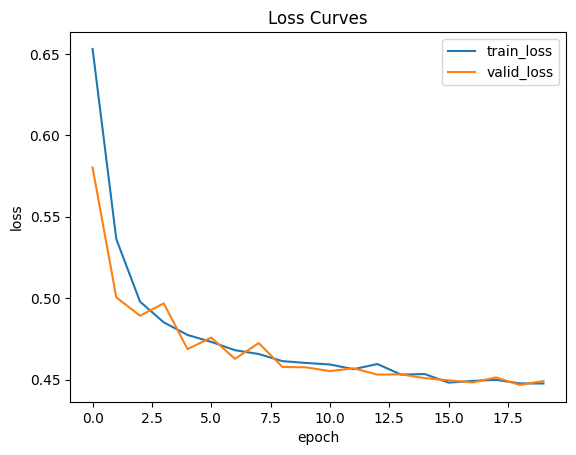

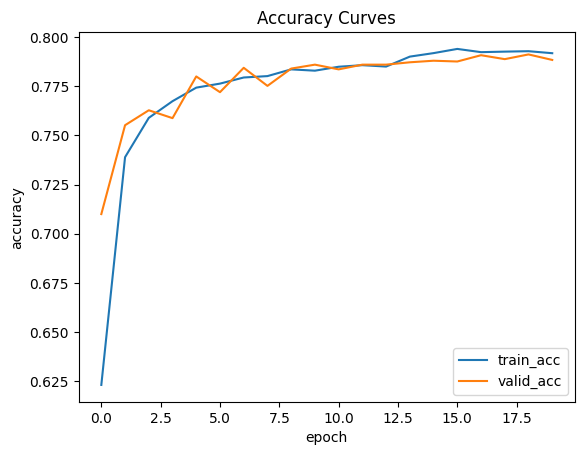

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history["train_loss"], label="train_loss")
plt.plot(history["valid_loss"], label="valid_loss")
plt.xlabel("epoch"); plt.ylabel("loss"); plt.legend(); plt.title("Loss Curves")
plt.show()

plt.figure()
plt.plot(history["train_acc"], label="train_acc")
plt.plot(history["valid_acc"], label="valid_acc")
plt.xlabel("epoch"); plt.ylabel("accuracy"); plt.legend(); plt.title("Accuracy Curves")
plt.show()


In [ ]:
test_loss, test_acc = run_epoch(test_loader, model, criterion, optimizer=None)
print(f"TEST | loss={test_loss:.4f} acc={test_acc:.4f}")

TEST | loss=0.4489 acc=0.7913


* Finetuning the pretrained embeddings

In [ ]:
# 1) Load GloVe dict
glove = load_glove_txt(glove_path, embedding_dim=EMBED_DIM)

# 2) Create embedding matrix aligned with 'stoi'
W = build_embedding_matrix(stoi, glove, embedding_dim=EMBED_DIM, pad_idx=PAD_IDX, oov_init="normal")

# 3) Build model with embed_dim=100 and load GloVe weights
model = SentimentMLP(vocab_size=len(stoi), embed_dim=EMBED_DIM, hidden_dims=(32, 32), pad_idx=PAD_IDX)

# Copy weights to model's embedding. Match device.
with torch.no_grad():
    model.embedding.weight.data.copy_(W)  # copy on CPU first
    model.embedding.weight.data[PAD_IDX].zero_()  # safety: make sure PAD row is 0

# (Option A) Freeze embeddings initially (common practice), then later unfreeze for small-lr fine-tuning
# for p in model.embedding.parameters():
#     p.requires_grad = False

# Move to device after weight init
model = model.to(DEVICE)
model

SentimentMLP(
  (embedding): Embedding(10000, 100, padding_idx=1)
  (mlp): Sequential(
    (0): Linear(in_features=100, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [ ]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

EPOCHS = 20
history = {"train_loss": [], "train_acc": [], "valid_loss": [], "valid_acc": []}
best_val_acc, best_state = 0.0, None

for epoch in range(1, EPOCHS + 1):
    tr_loss, tr_acc = run_epoch(train_loader, model, criterion, optimizer)
    va_loss, va_acc = run_epoch(valid_loader, model, criterion, optimizer=None)

    history["train_loss"].append(tr_loss)
    history["train_acc"].append(tr_acc)
    history["valid_loss"].append(va_loss)
    history["valid_acc"].append(va_acc)

    print(f"Epoch {epoch:02d} | train_loss={tr_loss:.4f} acc={tr_acc:.4f} | valid_loss={va_loss:.4f} acc={va_acc:.4f}")
    if va_acc > best_val_acc:
        best_val_acc = va_acc
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}

if best_state is not None:
    model.load_state_dict(best_state)

Epoch 01 | train_loss=0.5995 acc=0.6773 | valid_loss=0.4076 acc=0.8256
Epoch 02 | train_loss=0.3332 acc=0.8591 | valid_loss=0.3076 acc=0.8680
Epoch 03 | train_loss=0.2557 acc=0.8974 | valid_loss=0.2854 acc=0.8776
Epoch 04 | train_loss=0.2150 acc=0.9162 | valid_loss=0.2826 acc=0.8816
Epoch 05 | train_loss=0.1851 acc=0.9289 | valid_loss=0.3170 acc=0.8720
Epoch 06 | train_loss=0.1604 acc=0.9400 | valid_loss=0.2983 acc=0.8828
Epoch 07 | train_loss=0.1385 acc=0.9516 | valid_loss=0.3199 acc=0.8776
Epoch 08 | train_loss=0.1221 acc=0.9571 | valid_loss=0.3572 acc=0.8800
Epoch 09 | train_loss=0.1053 acc=0.9647 | valid_loss=0.3715 acc=0.8764
Epoch 10 | train_loss=0.0909 acc=0.9720 | valid_loss=0.4148 acc=0.8756
Epoch 11 | train_loss=0.0779 acc=0.9776 | valid_loss=0.4477 acc=0.8608
Epoch 12 | train_loss=0.0649 acc=0.9822 | valid_loss=0.4969 acc=0.8696
Epoch 13 | train_loss=0.0522 acc=0.9887 | valid_loss=0.5282 acc=0.8620
Epoch 14 | train_loss=0.0441 acc=0.9907 | valid_loss=0.5920 acc=0.8624
Epoch 

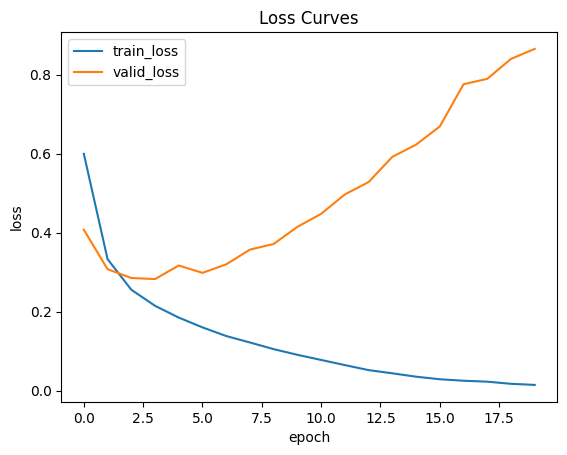

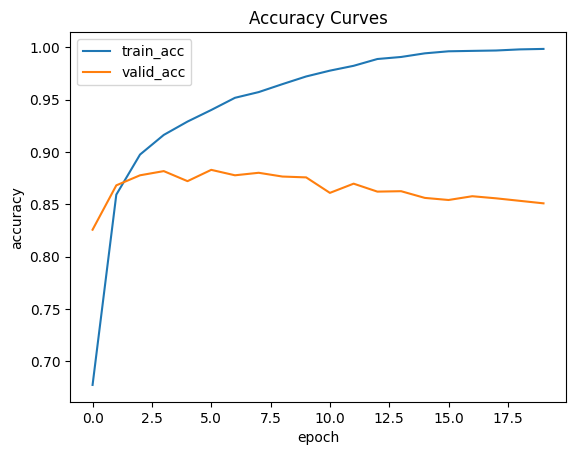

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history["train_loss"], label="train_loss")
plt.plot(history["valid_loss"], label="valid_loss")
plt.xlabel("epoch"); plt.ylabel("loss"); plt.legend(); plt.title("Loss Curves")
plt.show()

plt.figure()
plt.plot(history["train_acc"], label="train_acc")
plt.plot(history["valid_acc"], label="valid_acc")
plt.xlabel("epoch"); plt.ylabel("accuracy"); plt.legend(); plt.title("Accuracy Curves")
plt.show()


In [ ]:
test_loss, test_acc = run_epoch(test_loader, model, criterion, optimizer=None)
print(f"TEST | loss={test_loss:.4f} acc={test_acc:.4f}")

TEST | loss=0.3290 acc=0.8700


## 6.2 Recurrent neural networks

* What we did in the IMDB example: an entire movie review was transformed into a single vector and processed in one go. --> *feedforward networks*

* As you are reading the present sentence, you are processing it word by word while keeping memories of what came before.

* A *recurrent neural network* (RNN) processes sequences by iterating through the sequence elements and maintaining a *state* containing information relative to what it has seen so far.
  * The network internally loops over sequence elements.
  
    ><img src="https://drive.google.com/uc?id=1OJgVqYelS8d_Ilm8skVyo16FORCVyk_8" width="300">

  ```python
  # Pseudocode RNN
  state_t = 0 # the state at t
  for input_t in input_sequence: # iterates over sequence elements
    output_t = f(input_t, state_t)
    state_t = output_t # the previous output becomes the state for the next iteration
    
  # More detailed pseudocode for the RNN
  state_t = 0
  for input_t in input_sequence:
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
    state_t = output_t
  ```

In [ ]:
# Numpy implementation of a simple RNN
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features)) # input data

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
  successive_outputs.append(output_t)
  state_t = output_t

final_output_sequence = np.concatenate(successive_outputs, axis=0)

><img src="https://drive.google.com/uc?id=1ODlERe3Tl4zi_8a9eZBddqYQY7I4IEhd" width="800">

### A recurrent layer in PyTorch


  ```python
    import torch
    import torch.nn as nn

    rnn = nn.RNN(
        input_size=32,     # number of input features per timestep
        hidden_size=64,    # size of the hidden state (output features)
        batch_first=True   # input and output tensors have shape (batch, time, features)
    )

  ```


  * `RNN` processes batches of sequences.
    * Inputs `(batch_size, timesteps, input_features)`
    * The forward pass returns two tensors:
        ```python
        output, hidden = rnn(x)
        ```
      * `output`: contains the hidden state for each timestep
        * shape = `(batch_size, timesteps, hidden_size)`
      * `hidden`: contains the hidden state for the last timestep
        * shape = `(num_layers, batch_size, hidden_size)`

In [ ]:
import torch
import torch.nn as nn

rnn = nn.RNN(
    input_size=32,     # number of input features per timestep
    hidden_size=64,    # size of the hidden state (output features)
    batch_first=True   # input and output tensors have shape (batch, time, features)
)

x = torch.randn(8, 10, 32)  # (batch, timesteps, input_features)
output, hidden = rnn(x)

full_sequence = output              # all timesteps
last_output   = hidden[-1]          # last timestep only
print(full_sequence.shape)  # (8, 10, 64)
print(last_output.shape)    # (8, 64)


torch.Size([8, 10, 64])
torch.Size([8, 64])


In [ ]:
import torch
import torch.nn as nn

class SentimentRNN(nn.Module):
    def __init__(self, vocab_size, embed_dim=64, hidden_size=64, num_layers=1, pad_idx=None):
        super().__init__()
        # Embedding layer
        self.embedding = nn.Embedding(
            vocab_size,
            embed_dim,
            padding_idx=pad_idx if pad_idx is not None else 0
        )

        # Simple RNN layer
        self.rnn = nn.RNN(
            input_size=embed_dim,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )

        # Output layer
        self.fc = nn.Linear(hidden_size, 1)  # binary classification (logit output)

    def forward(self, x):
        # x: (B, T)
        emb = self.embedding(x)  # (B, T, E)

        # Handle padding (mask and sequence lengths)
        if hasattr(self.embedding, "padding_idx") and self.embedding.padding_idx is not None:
            pad_idx = self.embedding.padding_idx
            lengths = (x != pad_idx).sum(dim=1).cpu()  # (B,)
            packed = nn.utils.rnn.pack_padded_sequence(
                emb, lengths, batch_first=True, enforce_sorted=False
            )
            packed_out, hidden = self.rnn(packed)
            # hidden: (num_layers, B, hidden_size)
            last_hidden = hidden[-1]  # last layer's hidden state
        else:
            output, hidden = self.rnn(emb)
            last_hidden = hidden[-1]  # (B, hidden_size)

        logits = self.fc(last_hidden).squeeze(1)  # (B,)
        return logits


In [ ]:
!pip install torchinfo -q
from torchinfo import summary

model = SentimentRNN(vocab_size=10000).cpu()

summary(model, input_data=torch.randint(0, 10000, (1, 20)).long())


Layer (type:depth-idx)                   Output Shape              Param #
SentimentRNN                             [1]                       --
├─Embedding: 1-1                         [1, 20, 64]               640,000
├─RNN: 1-2                               [20, 64]                  8,320
├─Linear: 1-3                            [1, 1]                    65
Total params: 648,385
Trainable params: 648,385
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 11.29
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 2.59
Estimated Total Size (MB): 2.61

* Handling variable-length sequences with `nn.utils.rnn.pack_padded_sequence`
  * When working with text or sequential data, different samples often have different sequence lengths.
  * To form a batch, all sequences must be padded to the same length (e.g., using `<pad>` tokens).
  * However, RNNs will still process those padding tokens, which adds unnecessary computation and noise.
  * Ex.
    * "I love it" -> [12, 45, 88, 0]
    * "This movie is great" -> [13, 56, 44, 99]
    * "Bad" -> [77, 0, 0, 0]
    * The RNN will compute over all timesteps (including `<pad>`), even though most of those zeros carry no meaning.

  * `pack_padded_sequence`
    * PyTorch provides a utility that allows RNNs to ignore padded timesteps efficiently:
        ```python
        from torch.nn.utils.rnn import pack_padded_sequence

        packed = pack_padded_sequence(
            embedded_batch, lengths, batch_first=True, enforce_sorted=False
        )
        output, hidden = rnn(packed)
        ```
        * `embedded_batch`: (batch_size, seq_len, embed_dim)
        * `lengths`: a tensor or list containing the true lengths of each sequence
        * `batch_first=True`: ensures batch dimension comes first ((B, T, E))
        * `enforce_sorted=False`: lets you use unsorted batches safely
    * Once packed, the RNN will automatically skip over padding positions, processing only the valid tokens in each sequence.

In [ ]:
import torch
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence

# Example: three variable-length sequences (token IDs)
seqs = [
    torch.tensor([1, 2, 3, 4]),      # length = 4
    torch.tensor([5, 6, 7]),         # length = 3
    torch.tensor([8, 9])             # length = 2
]

# Pad them to the same length (right-padding with 0)
padded = pad_sequence(seqs, batch_first=True, padding_value=0)
print("Padded batch (shape =", padded.shape, "):\n", padded)

# Compute true lengths
lengths = torch.tensor([len(s) for s in seqs])
print("\nSequence lengths:", lengths.tolist())

# Pack the padded batch
packed = pack_padded_sequence(padded, lengths, batch_first=True, enforce_sorted=False)
print("\nPacked data representation:\n", packed.data)
print("Packed batch_sizes:", packed.batch_sizes)

# Unpack (restore to padded form)
unpacked, unpacked_lengths = pad_packed_sequence(packed, batch_first=True)
print("\nUnpacked (back to padded):\n", unpacked)


Padded batch (shape = torch.Size([3, 4]) ):
 tensor([[1, 2, 3, 4],
        [5, 6, 7, 0],
        [8, 9, 0, 0]])

Sequence lengths: [4, 3, 2]

Packed data representation:
 tensor([1, 5, 8, 2, 6, 9, 3, 7, 4])
Packed batch_sizes: tensor([3, 3, 2, 1])

Unpacked (back to padded):
 tensor([[1, 2, 3, 4],
        [5, 6, 7, 0],
        [8, 9, 0, 0]])


* Staking several recurrent layers

In [ ]:
!pip install torchinfo -q
from torchinfo import summary

model = SentimentRNN(vocab_size=10000, num_layers=2).cpu()

summary(model, input_data=torch.randint(0, 10000, (1, 20)).long())


Layer (type:depth-idx)                   Output Shape              Param #
SentimentRNN                             [1]                       --
├─Embedding: 1-1                         [1, 20, 64]               640,000
├─RNN: 1-2                               [20, 64]                  16,640
├─Linear: 1-3                            [1, 1]                    65
Total params: 656,705
Trainable params: 656,705
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 21.94
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 2.63
Estimated Total Size (MB): 2.65

* Revisit the IMDB movie review classification problem

In [ ]:
model = SentimentRNN(
    vocab_size=len(stoi),
    embed_dim=64,
    hidden_size=32,
    num_layers=1,
    pad_idx=PAD_IDX
).to(DEVICE)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

EPOCHS = 20
history = {"train_loss": [], "train_acc": [], "valid_loss": [], "valid_acc": []}
best_val_acc, best_state = 0.0, None

for epoch in range(1, EPOCHS + 1):
    tr_loss, tr_acc = run_epoch(train_loader, model, criterion, optimizer)
    va_loss, va_acc = run_epoch(valid_loader, model, criterion, optimizer=None)

    history["train_loss"].append(tr_loss)
    history["train_acc"].append(tr_acc)
    history["valid_loss"].append(va_loss)
    history["valid_acc"].append(va_acc)

    print(f"Epoch {epoch:02d} | train_loss={tr_loss:.4f} acc={tr_acc:.4f} | valid_loss={va_loss:.4f} acc={va_acc:.4f}")
    if va_acc > best_val_acc:
        best_val_acc = va_acc
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}

if best_state is not None:
    model.load_state_dict(best_state)


Epoch 01 | train_loss=0.6890 acc=0.5364 | valid_loss=0.6836 acc=0.5520
Epoch 02 | train_loss=0.6539 acc=0.6098 | valid_loss=0.6582 acc=0.6120
Epoch 03 | train_loss=0.5898 acc=0.6946 | valid_loss=0.5918 acc=0.7040
Epoch 04 | train_loss=0.5781 acc=0.7079 | valid_loss=0.6152 acc=0.6660
Epoch 05 | train_loss=0.5296 acc=0.7472 | valid_loss=0.6037 acc=0.6888
Epoch 06 | train_loss=0.5080 acc=0.7661 | valid_loss=0.5592 acc=0.7328
Epoch 07 | train_loss=0.4903 acc=0.7755 | valid_loss=0.5809 acc=0.7276
Epoch 08 | train_loss=0.5262 acc=0.7454 | valid_loss=0.5755 acc=0.7172
Epoch 09 | train_loss=0.5365 acc=0.7251 | valid_loss=0.6352 acc=0.6524
Epoch 10 | train_loss=0.5160 acc=0.7444 | valid_loss=0.6072 acc=0.6968
Epoch 11 | train_loss=0.4510 acc=0.7958 | valid_loss=0.5641 acc=0.7464
Epoch 12 | train_loss=0.4197 acc=0.8174 | valid_loss=0.5636 acc=0.7444
Epoch 13 | train_loss=0.3842 acc=0.8406 | valid_loss=0.5530 acc=0.7604
Epoch 14 | train_loss=0.3667 acc=0.8510 | valid_loss=0.5637 acc=0.7512
Epoch 

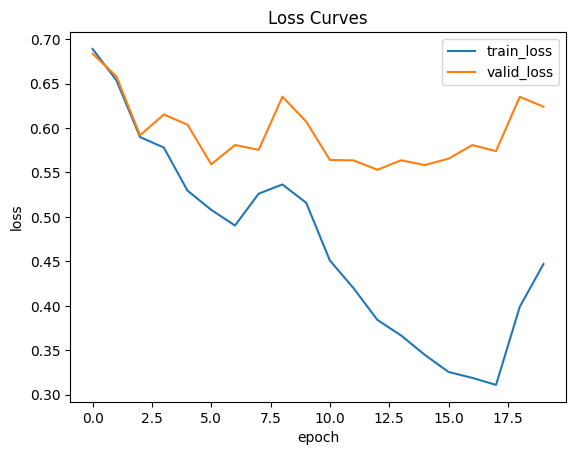

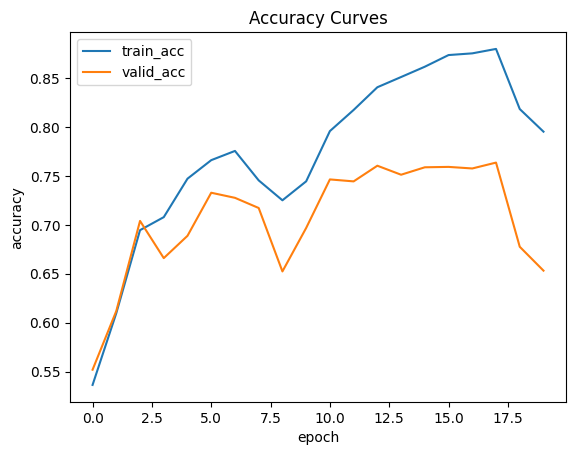

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history["train_loss"], label="train_loss")
plt.plot(history["valid_loss"], label="valid_loss")
plt.xlabel("epoch"); plt.ylabel("loss"); plt.legend(); plt.title("Loss Curves")
plt.show()

plt.figure()
plt.plot(history["train_acc"], label="train_acc")
plt.plot(history["valid_acc"], label="valid_acc")
plt.xlabel("epoch"); plt.ylabel("accuracy"); plt.legend(); plt.title("Accuracy Curves")
plt.show()


### Applications of RNNs

>><img src="https://drive.google.com/uc?id=1Kf6L0MI0lSWqgnYxR0b9G9nG61Ros-GS" width="600">

>><img src="https://drive.google.com/uc?id=1KhreGlUACdwEjo1h9o_soLJqDmlRR2xX" width="700">

>><img src="https://drive.google.com/uc?id=1KszNBSjt6Y1lz0a0dgH3ZJOQiKre-ph4" width="500">

>><img src="https://drive.google.com/uc?id=1Kt4WXV4Wa0XnAETy7pnmVJ_t0w2MNuAk" width="600">

> ### Flexibility of RNNs

>><img src="https://drive.google.com/uc?id=1L3mXKvGH3Jit-3EPrelnxX1jGPRfb2Qh" width="700">

### Understanding the LSTM and GRU layers

* There are two other popular recurrent layer: `LSTM` and `GRU`.

* `SimpleRNN` is difficult to learn long-term dependencies.
  * This is due to the *vanishing gradient problem*.
  
      

* Long Short-Term Memory (LSTM)
  * proposed by Hochreiter and Schmidhuber in 1997
  * It adds a way to carry information across many timesteps.
  
* `SimpleRNN`
  
  ><img src="https://drive.google.com/uc?id=1ZIY4kDeLJXQNjrEerE5qpqyjFpzV3YB9" width="800">
  
* `SimpleRNN` + additional data flow (carry)
  * An additional data flow that carries information across timesteps
    * `Ct` where `C` stands for *carry*
  * It will be combined with the input connections and the recurrent connection via a dense transformation.
  * Then, it will affect the state being sent to the next timestep.
  
    ><img src="https://drive.google.com/uc?id=1ZBn6n7PQPeYo4c5MIzcpERQIer-w4Z5d" width="800">
  
* `LSTM`
  * How is the next value of the carry dataflow computed?
    * It involves three distinct trasformations, which all have the form of the following:
    
    ```python
      y = activation(dot(state_t, U) + dot(input_t, W) + b)
    ```
    
    * All three transformations have their own weight matrices.
    
    ```python
      output_t = activation(dot(state_t, Uo) + dot(input_t, Wo) + dot(C_t, Vo) + bo)
  
      i_t = activation(dot(state_t, Ui) + dot(input_t, Wi) + bi)
      f_t = activation(dot(state_t, Uf) + dot(input_t, Wf) + bf)
      k_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bk)
    ```
    
    * We obtain the new carry state (`c_t`).
    
    ```python
      c_(t+1) = i_t * k_t + c_t * f_t
    ```
    
    ><img src="https://drive.google.com/uc?id=1ZLt95NdqUZaegliWTp39na1WeaxWyrGi" width="800">
  
  * Details of `LSTM`
    * `LSTM` diagram
    ><img src="https://drive.google.com/uc?id=1ZQBdC4-gkZ_Zl3Zr1evYXXuD7pf3GQjo" width="600">

    * Computations involved in `LSTM`
      ><img src="https://drive.google.com/uc?id=1ZTfTZPujoqNnFx2-Sb9GIPXihwQoqFko" width="400">


      

* GRU (Gated Recurrent Unit)

  * `GRU` diagram
  ><img src="https://drive.google.com/uc?id=1ZM5yXR7wmFKVzI6BUto-WsVBiFAm9J2k" width="600">
    
  * Computations involved in `GRU`
  ><img src="https://drive.google.com/uc?id=1ZB6VJFHjXb-2_Ogaq1l9uZevzuNlsNxI" width="400">


### LSTM example in PyTorch

In [ ]:
import torch
import torch.nn as nn

class SentimentLSTM(nn.Module):
    def __init__(self, vocab_size, embed_dim=64, hidden_size=64, num_layers=1, pad_idx=None):
        super().__init__()
        # Embedding layer
        self.embedding = nn.Embedding(
            vocab_size,
            embed_dim,
            padding_idx=pad_idx if pad_idx is not None else 0
        )

        # LSTM layer
        self.lstm = nn.LSTM(
            input_size=embed_dim,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )

        # Output layer
        self.fc = nn.Linear(hidden_size, 1)  # binary classification (logit output)

    def forward(self, x):
        # x: (B, T)
        emb = self.embedding(x)  # (B, T, E)

        # Handle padding (mask and sequence lengths)
        if hasattr(self.embedding, "padding_idx") and self.embedding.padding_idx is not None:
            pad_idx = self.embedding.padding_idx
            lengths = (x != pad_idx).sum(dim=1).cpu()  # (B,)
            packed = nn.utils.rnn.pack_padded_sequence(
                emb, lengths, batch_first=True, enforce_sorted=False
            )
            packed_out, (hidden, cell) = self.lstm(packed)
            # hidden: (num_layers, B, hidden_size)
            last_hidden = hidden[-1]  # last layer's hidden state
        else:
            output, hidden = self.lstm(emb)
            last_hidden = hidden[-1]  # (B, hidden_size)

        logits = self.fc(last_hidden).squeeze(1)  # (B,)
        return logits


In [ ]:
model = SentimentLSTM(
    vocab_size=len(stoi),
    embed_dim=64,
    hidden_size=32,
    num_layers=1,
    pad_idx=PAD_IDX
).to(DEVICE)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

EPOCHS = 20
history = {"train_loss": [], "train_acc": [], "valid_loss": [], "valid_acc": []}
best_val_acc, best_state = 0.0, None

for epoch in range(1, EPOCHS + 1):
    tr_loss, tr_acc = run_epoch(train_loader, model, criterion, optimizer)
    va_loss, va_acc = run_epoch(valid_loader, model, criterion, optimizer=None)

    history["train_loss"].append(tr_loss)
    history["train_acc"].append(tr_acc)
    history["valid_loss"].append(va_loss)
    history["valid_acc"].append(va_acc)

    print(f"Epoch {epoch:02d} | train_loss={tr_loss:.4f} acc={tr_acc:.4f} | valid_loss={va_loss:.4f} acc={va_acc:.4f}")
    if va_acc > best_val_acc:
        best_val_acc = va_acc
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}

if best_state is not None:
    model.load_state_dict(best_state)


Epoch 01 | train_loss=0.6766 acc=0.5595 | valid_loss=0.6332 acc=0.6412
Epoch 02 | train_loss=0.6217 acc=0.6840 | valid_loss=0.6209 acc=0.6672
Epoch 03 | train_loss=0.6479 acc=0.6232 | valid_loss=0.6429 acc=0.6380
Epoch 04 | train_loss=0.5682 acc=0.7108 | valid_loss=0.5201 acc=0.7396
Epoch 05 | train_loss=0.4917 acc=0.7706 | valid_loss=0.5129 acc=0.7552
Epoch 06 | train_loss=0.5017 acc=0.7592 | valid_loss=0.4681 acc=0.7964
Epoch 07 | train_loss=0.4641 acc=0.7834 | valid_loss=0.4919 acc=0.7828
Epoch 08 | train_loss=0.4540 acc=0.7896 | valid_loss=0.4468 acc=0.8052
Epoch 09 | train_loss=0.4283 acc=0.8141 | valid_loss=0.4423 acc=0.8060
Epoch 10 | train_loss=0.3534 acc=0.8544 | valid_loss=0.4261 acc=0.8096
Epoch 11 | train_loss=0.3267 acc=0.8695 | valid_loss=0.4059 acc=0.8320
Epoch 12 | train_loss=0.2984 acc=0.8837 | valid_loss=0.4137 acc=0.8268
Epoch 13 | train_loss=0.2879 acc=0.8904 | valid_loss=0.4037 acc=0.8296
Epoch 14 | train_loss=0.2768 acc=0.8947 | valid_loss=0.5504 acc=0.7836
Epoch 

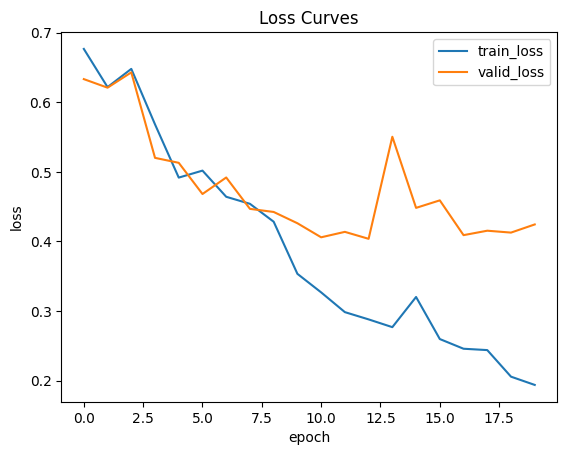

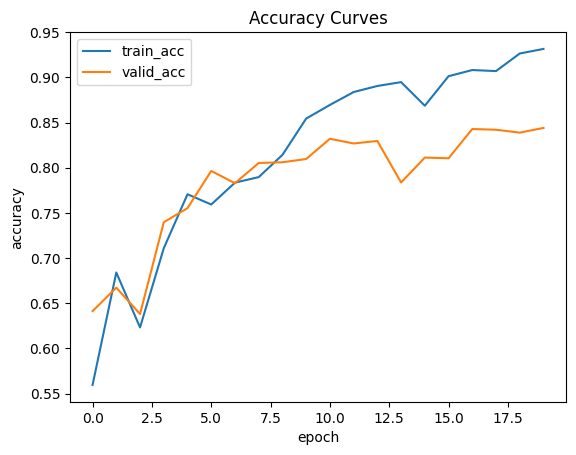

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history["train_loss"], label="train_loss")
plt.plot(history["valid_loss"], label="valid_loss")
plt.xlabel("epoch"); plt.ylabel("loss"); plt.legend(); plt.title("Loss Curves")
plt.show()

plt.figure()
plt.plot(history["train_acc"], label="train_acc")
plt.plot(history["valid_acc"], label="valid_acc")
plt.xlabel("epoch"); plt.ylabel("accuracy"); plt.legend(); plt.title("Accuracy Curves")
plt.show()


* **Exercise**: implement RNN or LSTM + mean pooling over timesteps + Linear

### Bidirectional RNNs

* A standard RNN (or an LSTM/GRU) processes a sequence chronologically, from the first token to the last. This is called a unidirectional model.
* The hidden state at any time step $t(h_t)$ only contains information about the inputs from the past $(x_1,...,x_t)$. It has no knowledge of what is coming next in the sequence.
* Consider "The apple pie was delicious.".
  * To correctly understand that "apple" refers to a food item (and not the company), it is helpful to know that the next word is "pie". A standard RNN making a decision at the word "apple" does not have this future context.

* A Bidirectional RNN solves this problem by processing the sequences in two directions at once:
  * A Forward RNN: from left to right
  * A Backward RNN: from right to left

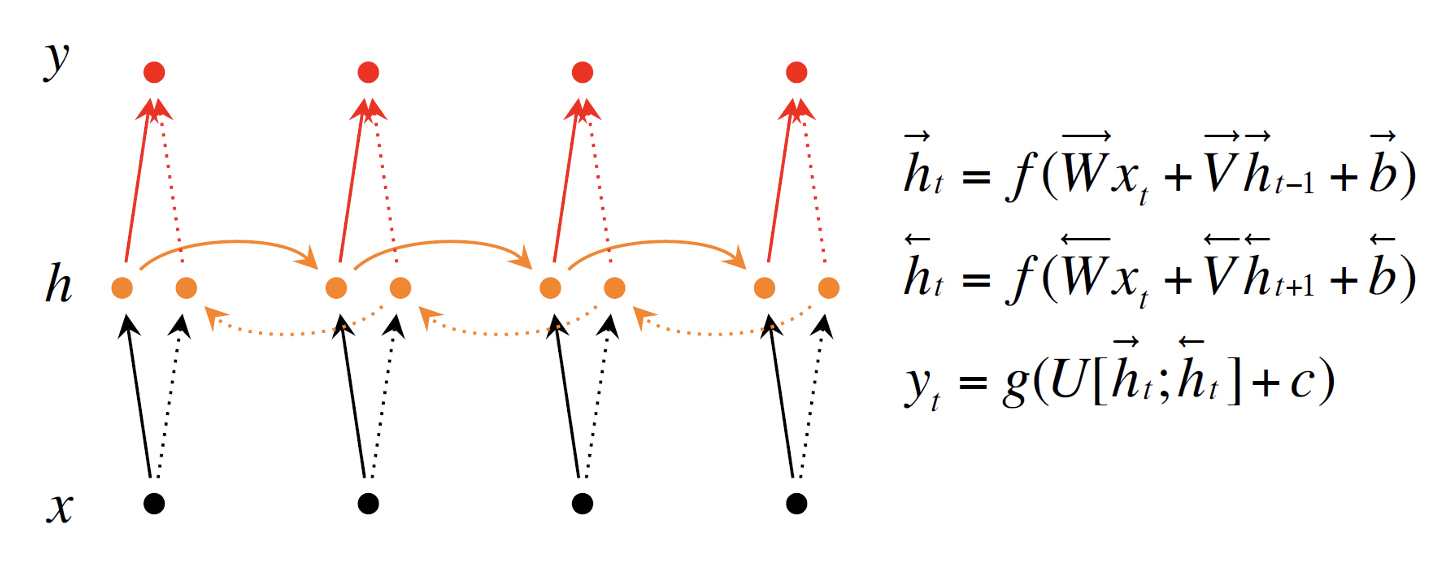

In [109]:
import torch
import torch.nn as nn

class BiLSTMSentiment(nn.Module):
    def __init__(self, vocab_size, embed_dim=100, hidden_size=128, num_layers=1, pad_idx=0, dropout=0.3):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=pad_idx)
        self.lstm = nn.LSTM(
            input_size=embed_dim,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            bidirectional=True,       # <— bidirectional LSTM
            dropout=0.0 if num_layers == 1 else dropout
        )
        # Concatenate forward/backward last hidden → 2*hidden_size
        self.head = nn.Sequential(
            nn.Dropout(dropout),
            nn.Linear(2 * hidden_size, 1)  # binary logit
        )

    def forward(self, x):
        # x: (B, T) with PAD indices
        emb = self.embedding(x)  # (B, T, E)

        # Pack to ignore PAD steps in the LSTM
        pad_idx = self.embedding.padding_idx if self.embedding.padding_idx is not None else 0
        lengths = (x != pad_idx).sum(dim=1).cpu()  # (B,)
        packed = nn.utils.rnn.pack_padded_sequence(emb, lengths, batch_first=True, enforce_sorted=False)

        packed_out, (h_n, c_n) = self.lstm(packed)
        # h_n: (num_layers*2, B, H). Take last layer’s forward/backward: [-2], [-1]
        last_fwd = h_n[-2]  # (B, H)
        last_bwd = h_n[-1]  # (B, H)
        feat = torch.cat([last_fwd, last_bwd], dim=1)  # (B, 2H)

        logits = self.head(feat).squeeze(1)  # (B,)
        return logits


In [111]:
model = BiLSTMSentiment(
    vocab_size=len(stoi),
    embed_dim=64,
    hidden_size=32,
    num_layers=1,
    pad_idx=PAD_IDX,
    dropout=0.2
).to(DEVICE)

print(model)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

EPOCHS = 20
history = {"train_loss": [], "train_acc": [], "valid_loss": [], "valid_acc": []}
best_val_acc, best_state = 0.0, None

for epoch in range(1, EPOCHS + 1):
    tr_loss, tr_acc = run_epoch(train_loader, model, criterion, optimizer)
    va_loss, va_acc = run_epoch(valid_loader, model, criterion, optimizer=None)

    history["train_loss"].append(tr_loss)
    history["train_acc"].append(tr_acc)
    history["valid_loss"].append(va_loss)
    history["valid_acc"].append(va_acc)

    print(f"Epoch {epoch:02d} | train_loss={tr_loss:.4f} acc={tr_acc:.4f} | valid_loss={va_loss:.4f} acc={va_acc:.4f}")
    if va_acc > best_val_acc:
        best_val_acc = va_acc
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}

if best_state is not None:
    model.load_state_dict(best_state)


BiLSTMSentiment(
  (embedding): Embedding(10000, 64, padding_idx=1)
  (lstm): LSTM(64, 32, batch_first=True, bidirectional=True)
  (head): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): Linear(in_features=64, out_features=1, bias=True)
  )
)
Epoch 01 | train_loss=0.6784 acc=0.5624 | valid_loss=0.6283 acc=0.6516
Epoch 02 | train_loss=0.5455 acc=0.7248 | valid_loss=0.4817 acc=0.7752
Epoch 03 | train_loss=0.4203 acc=0.8113 | valid_loss=0.3994 acc=0.8224
Epoch 04 | train_loss=0.3604 acc=0.8466 | valid_loss=0.3934 acc=0.8324
Epoch 05 | train_loss=0.2980 acc=0.8791 | valid_loss=0.3613 acc=0.8468
Epoch 06 | train_loss=0.2554 acc=0.8995 | valid_loss=0.3454 acc=0.8576
Epoch 07 | train_loss=0.2254 acc=0.9129 | valid_loss=0.3518 acc=0.8608
Epoch 08 | train_loss=0.1910 acc=0.9275 | valid_loss=0.3612 acc=0.8632
Epoch 09 | train_loss=0.1662 acc=0.9377 | valid_loss=0.3526 acc=0.8508
Epoch 10 | train_loss=0.1444 acc=0.9472 | valid_loss=0.3575 acc=0.8560
Epoch 11 | train_loss=0.1189 acc=0.

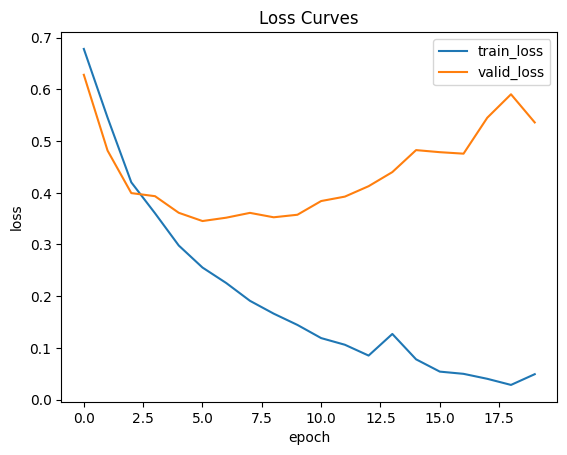

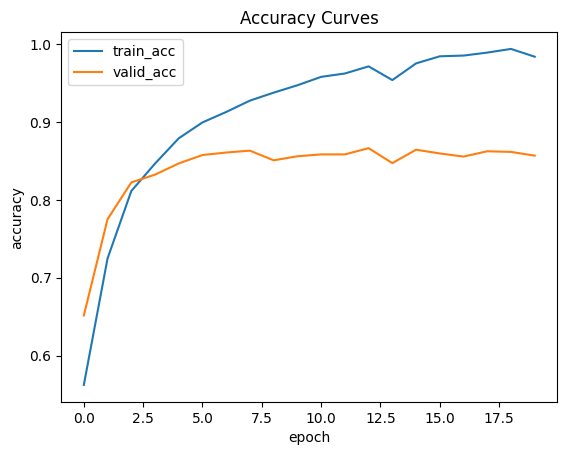

In [112]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history["train_loss"], label="train_loss")
plt.plot(history["valid_loss"], label="valid_loss")
plt.xlabel("epoch"); plt.ylabel("loss"); plt.legend(); plt.title("Loss Curves")
plt.show()

plt.figure()
plt.plot(history["train_acc"], label="train_acc")
plt.plot(history["valid_acc"], label="valid_acc")
plt.xlabel("epoch"); plt.ylabel("accuracy"); plt.legend(); plt.title("Accuracy Curves")
plt.show()


## 6.4 Sequence processing with convnets

* For sequence processing, time can be treated as a spatial dimension like the height or width of a 2D image.

* 1D convnets can be competitive with RNNs on certain sequence processing tasks.
  * It has cheaper computational cost.

> ### Understanding 1D convolution for sequence data

* We can use 1D convolutions, extracting local 1D patches (subsequences) from sequences.

  ><img src="https://drive.google.com/uc?id=1ZVspPrRTGhDAuuV--mOKfRgEIHsM9mae" width="500">

* Such 1D convolution layers can recognize local patterns in a sequence.

> ### 1D pooling for sequence data

* Similar to 2D pooling operations: 2D average/max pooling

* It extracts 1D patches (subsequences) from an input and outputting the maximum value (max pooling) or average value (average pooling).

* It is used for reducing the length of 1D inputs (subsampling).

> ### Implementing a 1D convnet

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# --- Conv1D Sentiment Model ---
class SentimentCNN(nn.Module):
    def __init__(self, vocab_size, embed_dim=128, pad_idx=0):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=pad_idx)

        self.conv_block = nn.Sequential(
            nn.Conv1d(in_channels=embed_dim, out_channels=32, kernel_size=7),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=5),
            nn.Conv1d(in_channels=32, out_channels=32, kernel_size=7),
            nn.ReLU()
        )

        # Global max pooling over time
        self.global_max_pool = nn.AdaptiveMaxPool1d(1)

        # Fully connected output layer
        self.fc = nn.Linear(32, 1)

    def forward(self, x):
        # x: (B, T)
        emb = self.embedding(x)          # (B, T, E)
        emb = emb.transpose(1, 2)        # (B, E, T) → required by Conv1d

        features = self.conv_block(emb)  # (B, 32, L)
        pooled = self.global_max_pool(features).squeeze(-1)  # (B, 32)
        logits = self.fc(pooled).squeeze(1)                  # (B,)
        return logits

# --- Model initialization ---
model = SentimentCNN(vocab_size=len(stoi), embed_dim=128, pad_idx=PAD_IDX).to(DEVICE)
print(model)


SentimentCNN(
  (embedding): Embedding(10000, 128, padding_idx=1)
  (conv_block): Sequential(
    (0): Conv1d(128, 32, kernel_size=(7,), stride=(1,))
    (1): ReLU()
    (2): MaxPool1d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
    (3): Conv1d(32, 32, kernel_size=(7,), stride=(1,))
    (4): ReLU()
  )
  (global_max_pool): AdaptiveMaxPool1d(output_size=1)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [ ]:
# criterion = nn.BCEWithLogitsLoss()
# optimizer = optim.RMSprop(model.parameters(), lr=1e-4)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)


EPOCHS = 10
history = {"train_loss": [], "train_acc": [], "valid_loss": [], "valid_acc": []}
best_val_acc, best_state = 0.0, None

for epoch in range(1, EPOCHS + 1):
    tr_loss, tr_acc = run_epoch(train_loader, model, criterion, optimizer)
    va_loss, va_acc = run_epoch(valid_loader, model, criterion, optimizer=None)

    history["train_loss"].append(tr_loss)
    history["train_acc"].append(tr_acc)
    history["valid_loss"].append(va_loss)
    history["valid_acc"].append(va_acc)

    print(f"[CNN] Epoch {epoch:02d} | "
          f"train_loss={tr_loss:.4f} acc={tr_acc:.4f} | "
          f"valid_loss={va_loss:.4f} acc={va_acc:.4f}")

    if va_acc > best_val_acc:
        best_val_acc = va_acc
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}

# Load best weights
if best_state is not None:
    model.load_state_dict(best_state)
    print(f"Loaded best CNN model (val_acc={best_val_acc:.4f}).")

# Evaluate on test set
test_loss, test_acc = run_epoch(test_loader, model, criterion, optimizer=None)
print("=" * 60)
print(f"[CNN] Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")
print("=" * 60)


[CNN] Epoch 01 | train_loss=0.6301 acc=0.6212 | valid_loss=0.4997 acc=0.7588
[CNN] Epoch 02 | train_loss=0.4041 acc=0.8181 | valid_loss=0.3944 acc=0.8244
[CNN] Epoch 03 | train_loss=0.2785 acc=0.8861 | valid_loss=0.3615 acc=0.8372
[CNN] Epoch 04 | train_loss=0.1908 acc=0.9282 | valid_loss=0.3740 acc=0.8476
[CNN] Epoch 05 | train_loss=0.1231 acc=0.9605 | valid_loss=0.4028 acc=0.8556
[CNN] Epoch 06 | train_loss=0.0700 acc=0.9822 | valid_loss=0.4521 acc=0.8516
[CNN] Epoch 07 | train_loss=0.0340 acc=0.9945 | valid_loss=0.5002 acc=0.8548
[CNN] Epoch 08 | train_loss=0.0148 acc=0.9992 | valid_loss=0.5521 acc=0.8580
[CNN] Epoch 09 | train_loss=0.0063 acc=0.9999 | valid_loss=0.6019 acc=0.8572
[CNN] Epoch 10 | train_loss=0.0031 acc=1.0000 | valid_loss=0.6410 acc=0.8556
Loaded best CNN model (val_acc=0.8580).
[CNN] Test Loss: 0.5811 | Test Accuracy: 0.8463


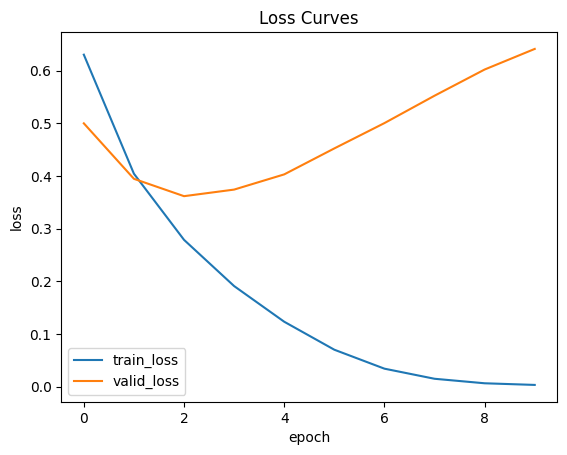

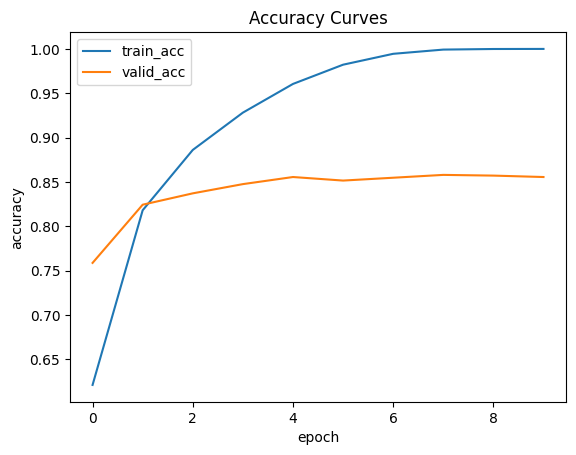

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history["train_loss"], label="train_loss")
plt.plot(history["valid_loss"], label="valid_loss")
plt.xlabel("epoch"); plt.ylabel("loss"); plt.legend(); plt.title("Loss Curves")
plt.show()

plt.figure()
plt.plot(history["train_acc"], label="train_acc")
plt.plot(history["valid_acc"], label="valid_acc")
plt.xlabel("epoch"); plt.ylabel("accuracy"); plt.legend(); plt.title("Accuracy Curves")
plt.show()
